# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

# Reading the dataset

In [5]:
data  = pd.read_csv('Training.csv')

In [6]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## Removing the null column from the dataset

In [9]:
data = pd.read_csv('Training.csv').dropna(axis = 1)

In [10]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Checking whether the dataset is balanced or not

In [11]:
disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({
        "Disease" : disease_counts.index,
        "Counts" : disease_counts.values
})

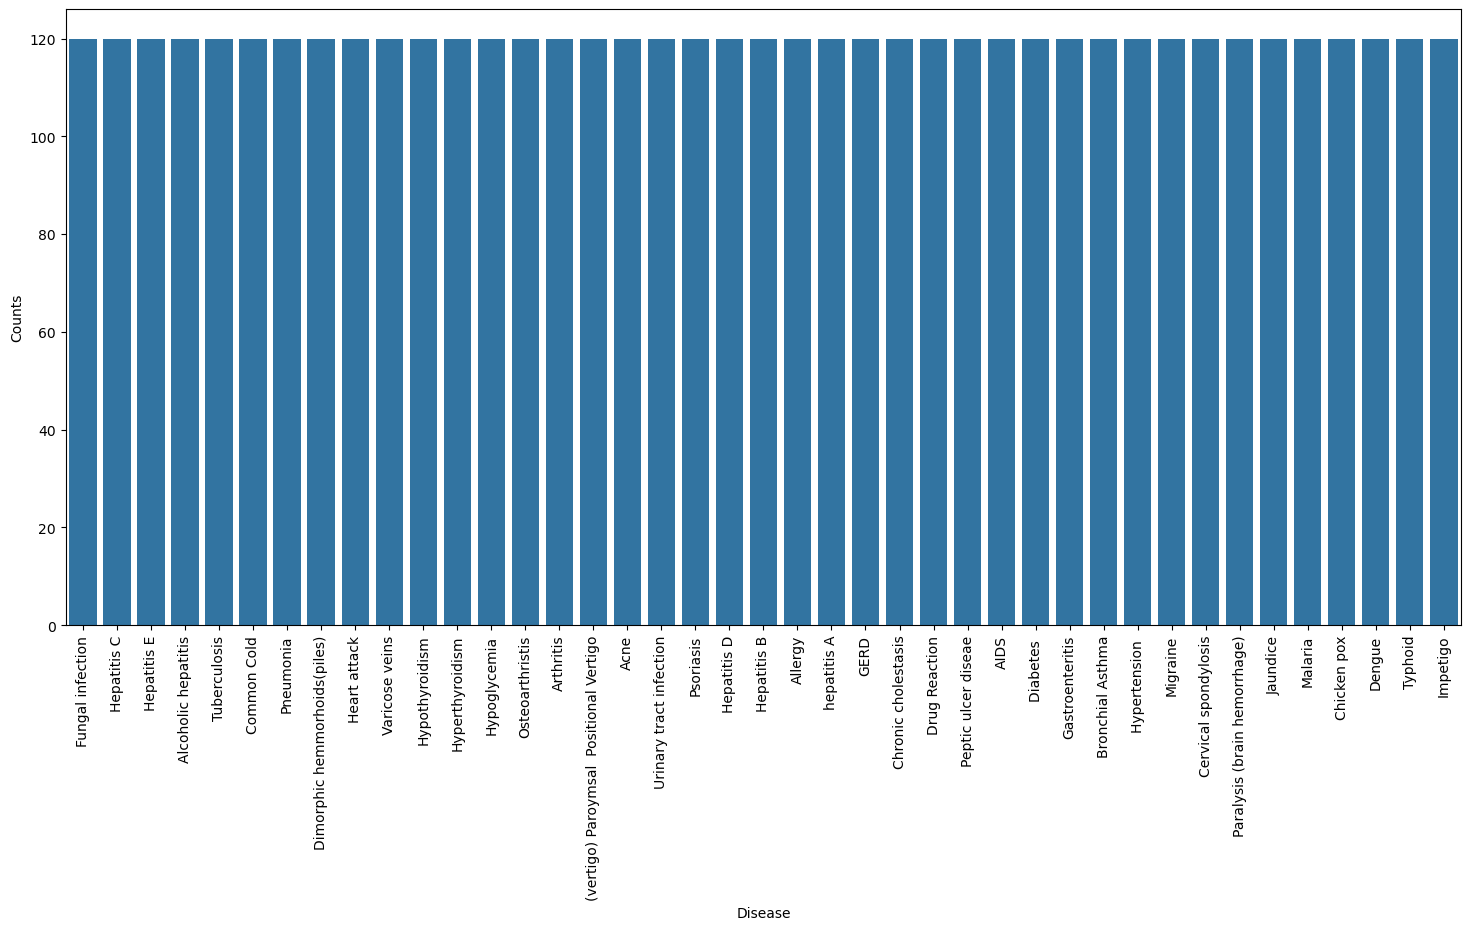

In [23]:
plt.figure(figsize=(18,8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

# Encoding the Target value into numerical value using Label Encoder

In [24]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [25]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


# Splitting the data into training and testing 

In [28]:
X = data.iloc[:,:-1]
Y = data.iloc[:, -1]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [30]:
print(f'Train: {X_train.shape}, {Y_train.shape}')
print(f'Test: {X_test.shape}, {Y_test.shape}')

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


# Using K-Fold Cross-Validation for model selection

## Defining scoring matric for k-fold cross validation

In [34]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

## Initializing Models

In [35]:
models = {
    "SCV" : SVC(),
    "Gaussian NB" : GaussianNB(),
    "Random Forest" : RandomForestClassifier(random_state=18)
}

## Producing cross validation score for the models

In [36]:
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv=10, n_jobs=-1, scoring = cv_scoring)
    
    print("=="*30)
    print(model_name)
    print(f"Scores : {scores}")
    print(f"Mean Score : {np.mean(scores)}")

SCV
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0
Gaussian NB
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0
Random Forest
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0


# Building a robust classifier by combining all models

### Training and testing SVM classifier

Accuracy on train data by SVM Classifier : 100.0
Accuracy on test data by SVM Classifier : 100.0


Text(0.5, 1.0, 'Confision Matrix for SVM Classifier on Test Data')

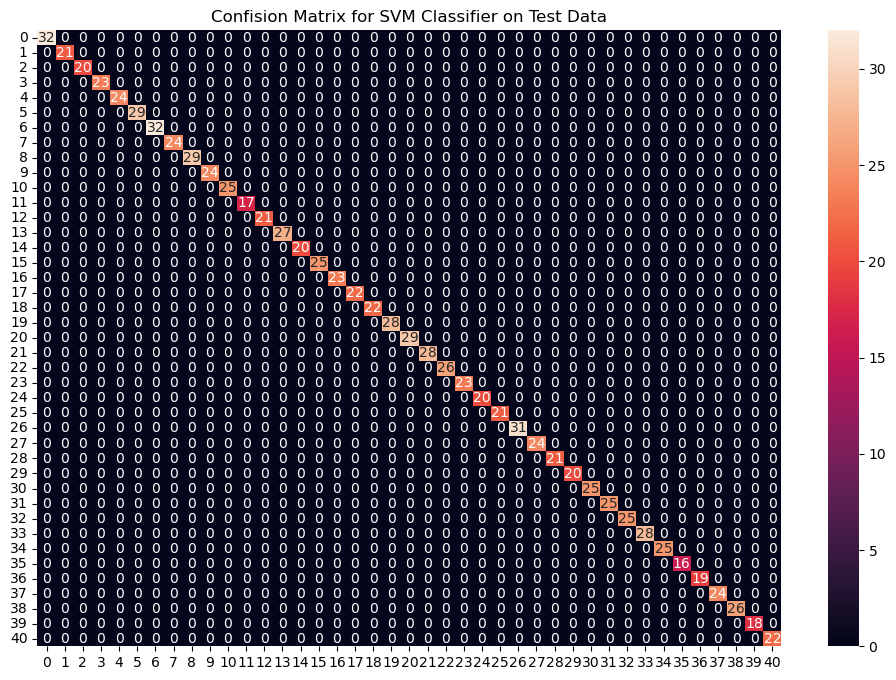

In [37]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier : {accuracy_score(Y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier : {accuracy_score(Y_test, preds)*100}")

cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confision Matrix for SVM Classifier on Test Data")

## Training and testing by Naive Bayes Classifier 

Accuracy on train data by Naive Bayes Classifier : 100.0
Accuracy on test data by Naive Bayes Classifier : 100.0


Text(0.5, 1.0, 'Confision Matrix for Naive Bayes Classifier on Test Data')

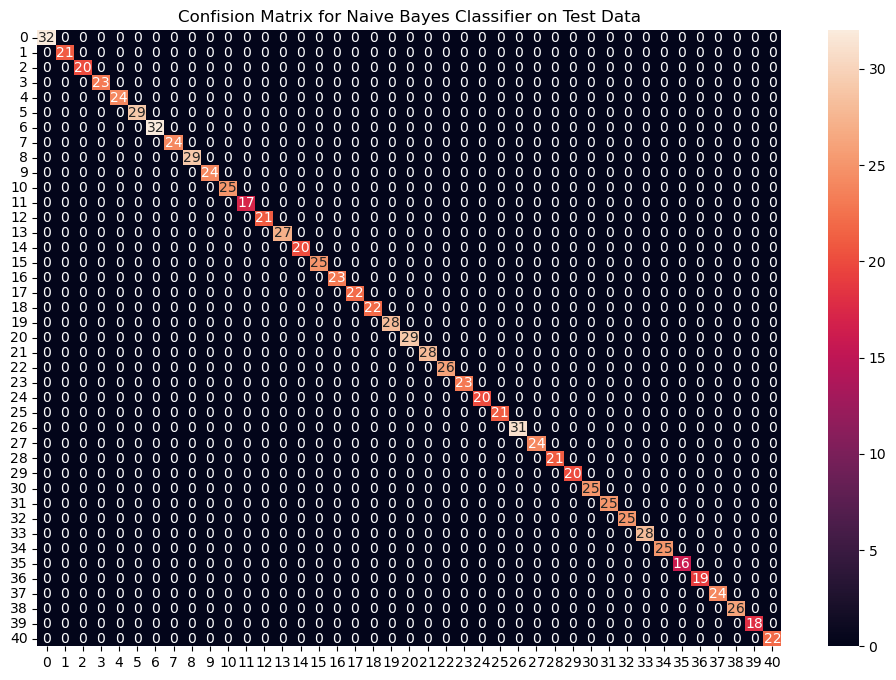

In [38]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on train data by Naive Bayes Classifier : {accuracy_score(Y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier : {accuracy_score(Y_test, preds)*100}")

cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confision Matrix for Naive Bayes Classifier on Test Data")

## Training and Testing Random Forest Classifier

Accuracy on train data by Random Forest Classifier : 100.0
Accuracy on test data by Random Forest Classifier : 100.0


Text(0.5, 1.0, 'Confision Matrix for Random Forest Classifier on Test Data')

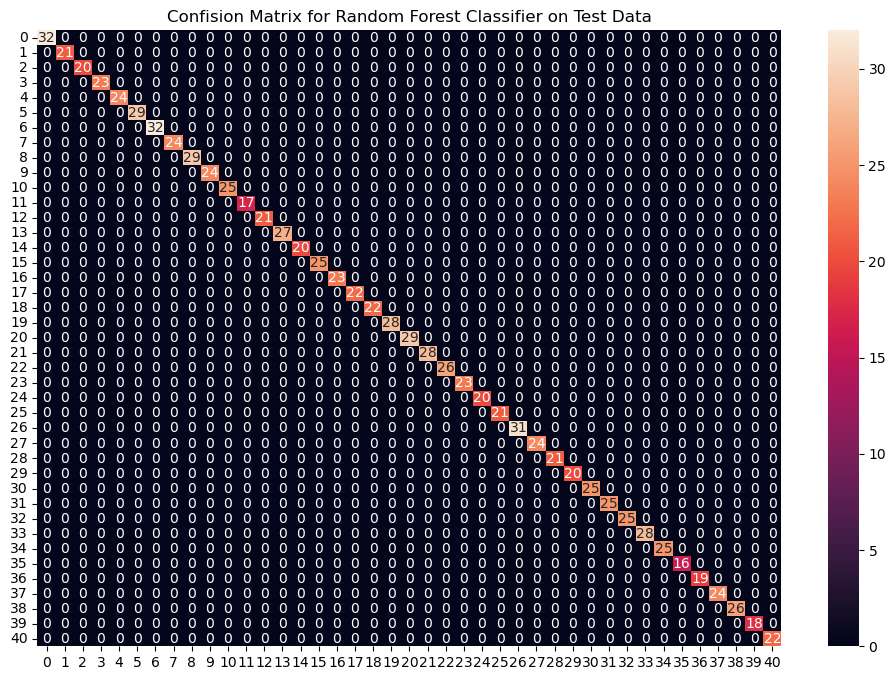

In [39]:
rf_model = SVC()
rf_model.fit(X_train, Y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier : {accuracy_score(Y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier : {accuracy_score(Y_test, preds)*100}")

cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confision Matrix for Random Forest Classifier on Test Data")

# Fitting the model on whole data and validating on the Test Dataset

### Training the models on whole data

In [41]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state = 18)
final_svm_model.fit(X,Y)
final_nb_model.fit(X,Y)
final_rf_model.fit(X,Y)

RandomForestClassifier(random_state=18)

### Reading the test data

In [42]:
test_data = pd.read_csv('Testing.csv').dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:,-1])

### Making Predictions by taking mode of predictions made by all the classifiers

C:\Users\Asus\AppData\Local\Temp\ipykernel_6624\3120701877.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [mode([i,j,k])[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]


Accuracy on Test Dataset by the combined model : 100.0


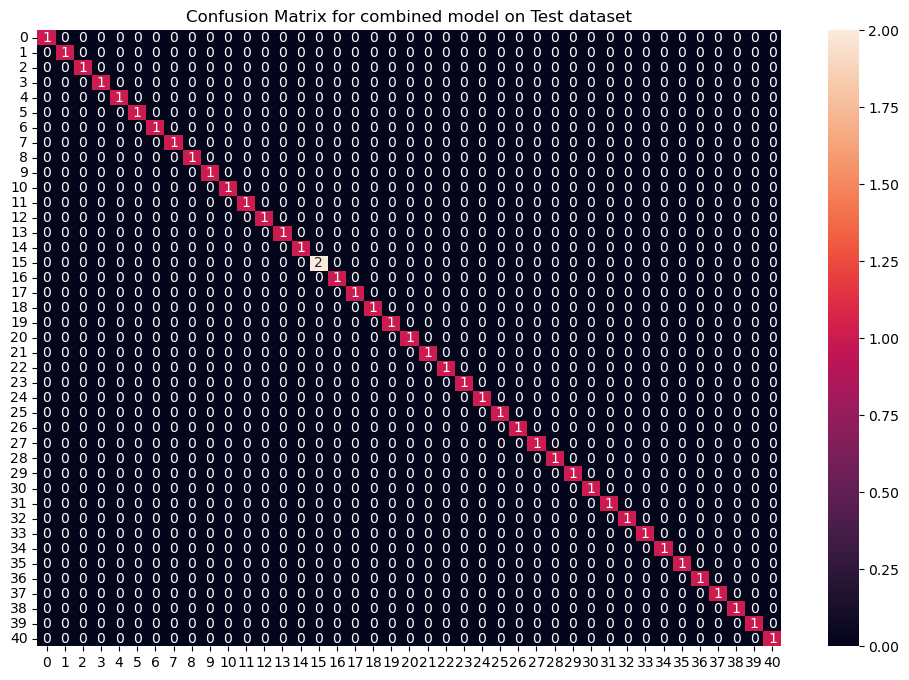

In [44]:
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test Dataset by the combined model : {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title('Confusion Matrix for combined model on Test dataset')
plt.show()

# Creating a function that can take symptoms as inputs and generate predictions for disease

In [45]:
symptoms = X.columns.values

### Creating a symptom index dictionary to encode the input symptom into numerical form

In [46]:
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    
data_dict = {
    "symptom_index" : symptom_index,
    "predictions_classes" : encoder.classes_
}

## Difining the function 
### Input : String containing symptoms separated by commas
### Output : Generated predictions by models

In [62]:
def predictiDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # Creating input data for the models
    input_data = [0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it into suitable format for the model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # Making final predictions by taking mode of all the predictions 
    
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction" : rf_prediction,
        "naive_bayes_model_prediction" : nb_prediction,
        "svm_model_prediction" : svm_prediction,
        "final_prediction" : final_prediction,
    }
    
    
    return predictions

# Testing the function

In [65]:
print(predictiDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_model_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_6624\2255717751.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi